# AMIT ANAND. 220968430. DSE B

## WEEK4: EX1: CEREALS

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("C:\\Users\\AMIT ANAND\\OneDrive\\Desktop\\Cereals1.csv")

1. Cross tabulate the type of cereal (hot vs cold) against the manufacturer

In [2]:
pd.crosstab(df['type'], df['mfr'])

mfr,A,G,K,N,P,Q,R
type,,,,,,,
C,0,22,23,4,9,7,8
H,1,0,0,1,0,1,0


2. Which is the cereal with the best rating, worst rating?

In [3]:
df[df['rating'] == df['rating'].max()]['name']

2    All-Bran_with_Extra_Fiber
Name: name, dtype: object

In [4]:
df[df['rating'] == df['rating'].min()]['name']

9    Cap'n'Crunch
Name: name, dtype: object

3. Plot a side-by-side boxplot comparing the consumer rating of hot vs. cold cereals

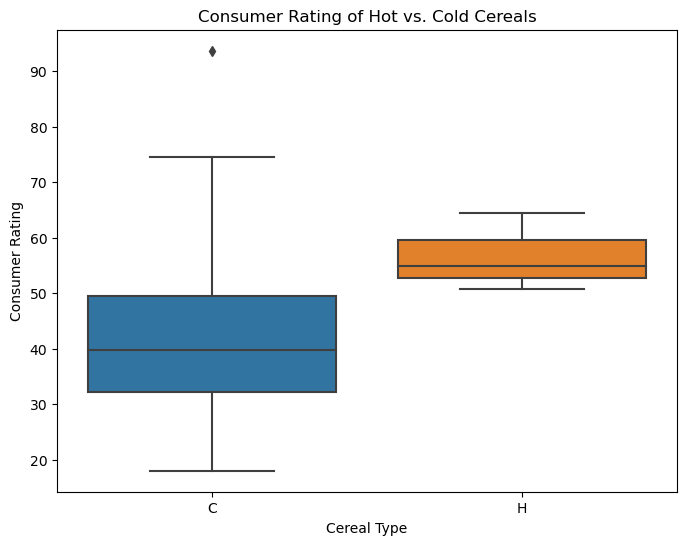

In [5]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='type', y='rating')
plt.title("Consumer Rating of Hot vs. Cold Cereals")
plt.xlabel("Cereal Type")
plt.ylabel("Consumer Rating")
plt.show()


4. Is there a relation between sugars, calories, carbs, and fat?


In [6]:
 df[['sugars', 'calories', 'carbo', 'fat']].corr()

,sugars,calories,carbo,fat
sugars,1.000000,0.571072,-0.349902,0.270861
calories,0.571072,1.000000,0.205913,0.510630
carbo,-0.349902,0.205913,1.000000,-0.329676
fat,0.270861,0.510630,-0.329676,1.000000


5. Which manufacturers produce cereal with highest calories?

In [7]:
df[df['calories'] == df['calories'].max()]['mfr']

45    K
Name: mfr, dtype: object

6. Use correlation tests and visualization to identify if the two variables calories and consumer rating associated?

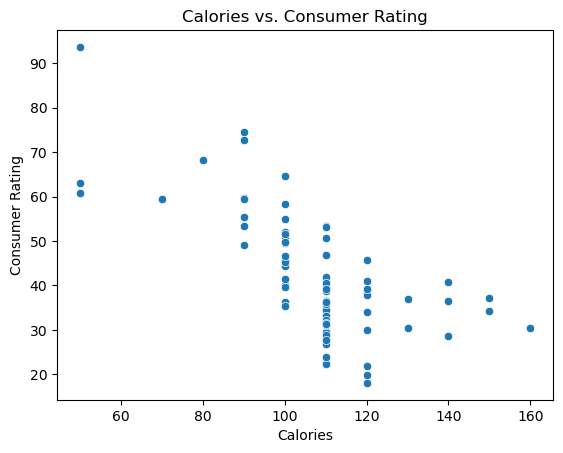

In [8]:
sns.scatterplot(data=df, x='calories', y='rating')
plt.title("Calories vs. Consumer Rating")
plt.xlabel("Calories")
plt.ylabel("Consumer Rating")
plt.show()

In [9]:
 df['calories'].corr(df['rating'])

-0.6743360496799726

7. Use correlation tests and visualization to identify if the two variables shelf and
consumer rating associated?

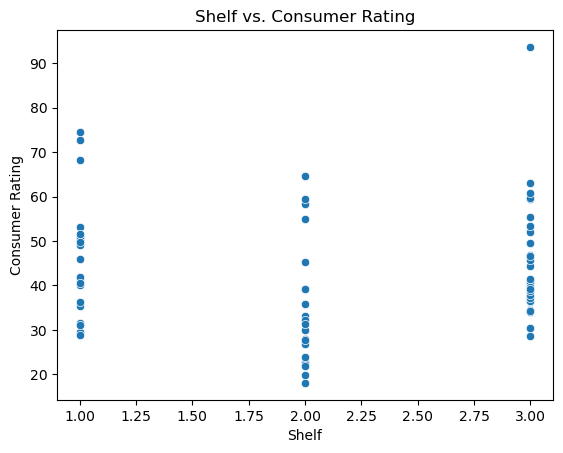

In [10]:
sns.scatterplot(data=df, x='shelf', y='rating')
plt.title("Shelf vs. Consumer Rating")
plt.xlabel("Shelf")
plt.ylabel("Consumer Rating")
plt.show()


In [11]:
df['shelf'].corr(df['rating'])

0.001973020750965257

8. Is there a relation between manufacturer and rating

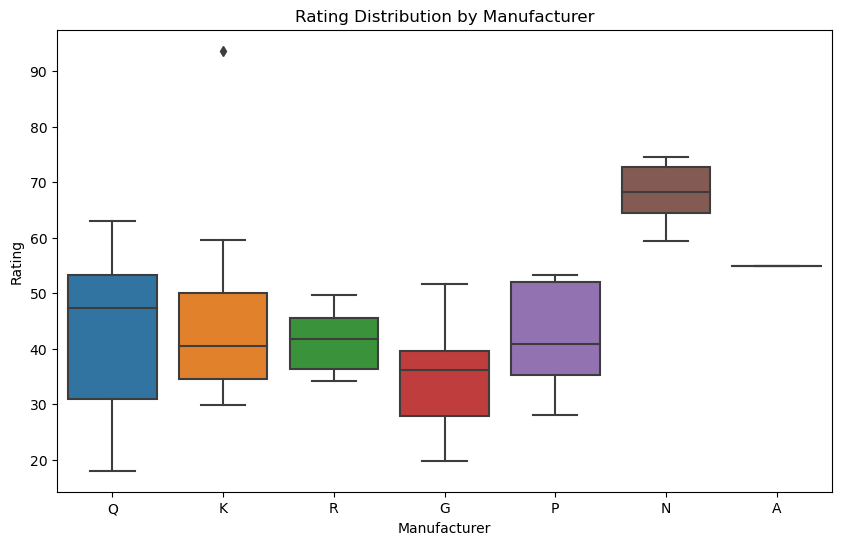

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='mfr', y='rating', data=df)
plt.xlabel('Manufacturer')
plt.ylabel('Rating')
plt.title('Rating Distribution by Manufacturer')
plt.show()

9. Which nutrients are essential for a good rating for a cereal?

In [13]:
nutrient_columns = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']
l={}
ll=[]
for key in nutrient_columns:
    corr= df[key].corr(df['rating'])
    print("Between "+key+" and Rating: "+str(corr))
    l[key]=corr
    ll.append(corr)
    
max_val=max(l, key=l.get)
print(max_val)

min_val=min(l, key=l.get)
print(min_val)

Between calories and Rating: -0.6743360496799726
Between protein and Rating: 0.4536831680905635
Between fat and Rating: -0.4184389012415263
Between sodium and Rating: -0.40207717976320245
Between fiber and Rating: 0.5572418136133624
Between carbo and Rating: 0.11317283230180675
Between sugars and Rating: -0.772302799253264
Between potass and Rating: 0.33992463955681484
Between vitamins and Rating: -0.24251614776429342
fiber
sugars


In [14]:
# Select the top 3 related nutrients (replace with your own choices)
top_nutrients = ['fiber','sugars','calories']

X = df[top_nutrients]
y = df['rating']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Evaluate the model using metrics such as Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 19.879095560847773
R-squared (R2): 0.815574646323953
